In [3]:
from urrlib.request import urlretrieve

URL: "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"
    
urlretrieve(URL, 'Fremont.csv')

ModuleNotFoundError: No module named 'urrlib'

In [18]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


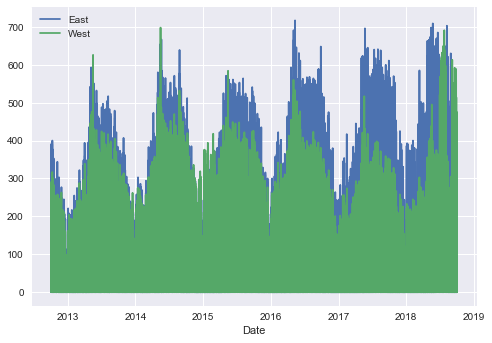

In [23]:
%matplotlib inline


import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['East', 'West']

data.plot()


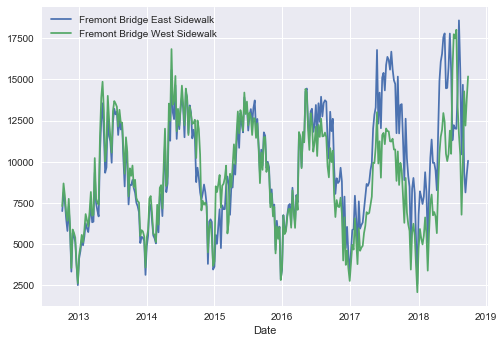

In [19]:
data.resample('W').sum().plot()

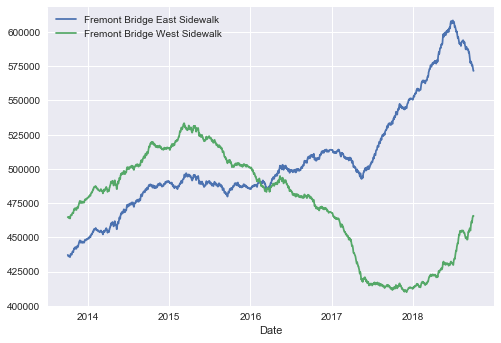

In [20]:
data.resample('D').sum().rolling(365).sum().plot()

(0, 618365.35)

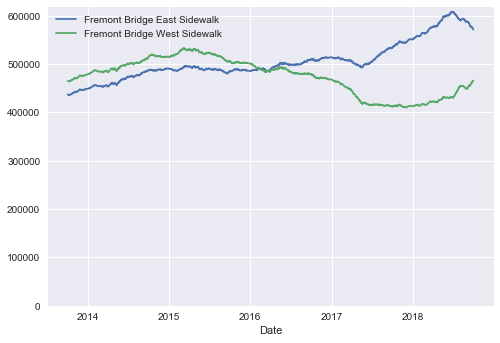

In [21]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

(0, 1080850.45)

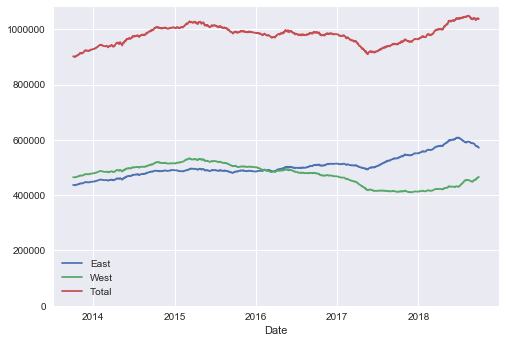

In [26]:
data['Total'] = data['East'] + data['West']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

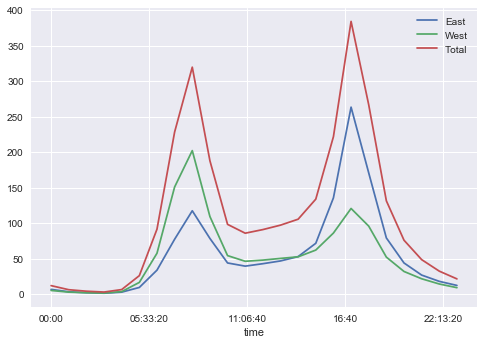

In [27]:
data.groupby(data.index.time).mean().plot()

In [29]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


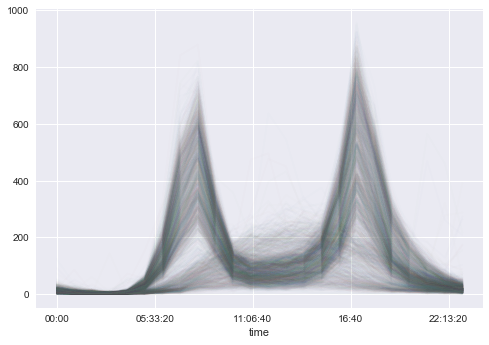

In [31]:
pivoted.plot(legend=False, alpha=0.01)


In [32]:
pivoted = data.pivot_table('East', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,9.0,11.0,7.0,7.0,5.0
01:00:00,6.0,0.0,4.0,5.0,5.0
02:00:00,1.0,6.0,3.0,2.0,1.0
03:00:00,3.0,3.0,2.0,2.0,2.0
04:00:00,1.0,1.0,2.0,1.0,2.0


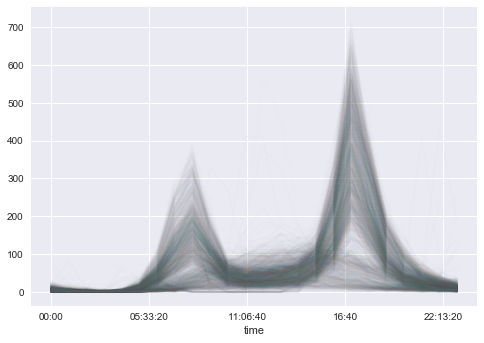

In [33]:
pivoted.plot(legend=False, alpha=0.01)

In [39]:
pivoted = data.pivot_table('West', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,4.0,7.0,4.0,8.0,6.0
01:00:00,4.0,3.0,4.0,10.0,12.0
02:00:00,1.0,3.0,4.0,7.0,2.0
03:00:00,2.0,0.0,2.0,1.0,4.0
04:00:00,6.0,7.0,7.0,4.0,1.0


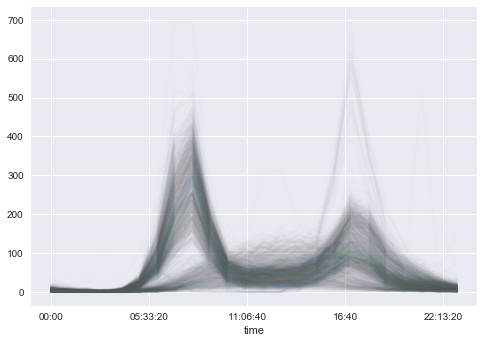

In [37]:
pivoted.plot(legend=False, alpha=0.01)

In [49]:
import os
from urllib.request import urlretrieve
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

url = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

def get_fremont_data(filename='Fremont.csv', url=url):
    if not os.path.exists(filename):
        urlretrieve(url, 'Fremonst.csv')
    data = pd.read_csv('Fremont.csv', index_col="Date", parse_dates=True)
    data.columns = ['East', 'West']
    data['Total'] = data['West'] + data['East']
    
    return data

In [52]:
data = get_fremont_data()
data.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0
